In [9]:
from tensorflow import keras 
from sklearn.model_selection import train_test_split

In [10]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [11]:
train_input.shape

(60000, 28, 28)

In [12]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 뒤에 1을 추가했다는건 4차원으로 만들겠다는 것이다. -> 종이 한장을 두껍게 만든거다? / 흑백일때는 상관없는데 컬러일 경우는 무조건이다.

In [13]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [14]:
model = keras.Sequential()

In [15]:
model.add(keras.layers.Conv2D(
    32, # 필터의 갯수 / 찾고자 하는 특성의 갯수
    kernel_size = 3, # 얼마만큼의 사이즈로 filter할거냐 (3*3)
    activation = 'relu',
    padding = 'same', # 내 사진과 같은 사이즈의 padding을 넣어 준다
    input_shape = (28, 28, 1)
))

/Users/chojungseok/Desktop/code/DAMF2/ML/DL/DLvenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.add(keras.layers.MaxPooling2D(
    2 # 2*2사이즈를 pooling하겠다
))

In [17]:
model.add(keras.layers.Conv2D(
    64, #kernel 64개
    kernel_size = 3,
    activation = 'relu',
    padding = 'same'
))
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(keras.layers.Flatten()) # 사진을 일괄적으로 평탄화
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
es = keras.callbacks.EarlyStopping(patience=2)

result = model.fit(
    train_scaled, 
    train_target,
    validation_data = (val_scaled, val_target),
    callbacks = [es],
    epochs = 20
    )

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8660 - loss: 0.3791 - val_accuracy: 0.8961 - val_loss: 0.2889
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8854 - loss: 0.3152 - val_accuracy: 0.9021 - val_loss: 0.2631
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8992 - loss: 0.2751 - val_accuracy: 0.9141 - val_loss: 0.2363
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9100 - loss: 0.2495 - val_accuracy: 0.9131 - val_loss: 0.2337
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9167 - loss: 0.2264 - val_accuracy: 0.9176 - val_loss: 0.2279
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9236 - loss: 0.2055 - val_accuracy: 0.9201 - val_loss: 0.2264
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9285 - loss: 0.1909 - val_accuracy: 0.9177 - val_loss: 0.2312
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9344 - l

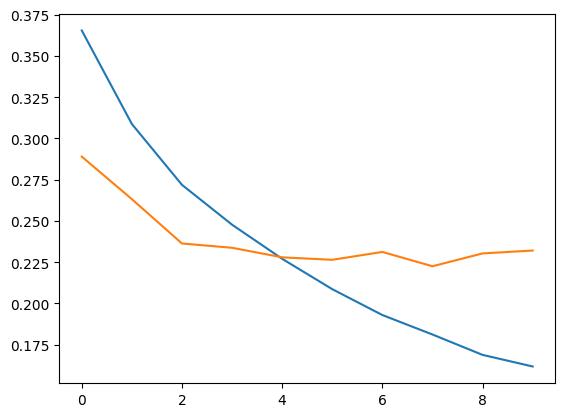

In [25]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [26]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9242 - loss: 0.2206


[0.23200662434101105, 0.920199990272522]

In [27]:
test_scaled = test_input.reshape(-1, 28,28, 1) / 255.0

In [28]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9120 - loss: 0.2684


[0.2569940686225891, 0.9143999814987183]